In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
from collections import Counter,defaultdict
import matplotlib.image as mpimg
from IPython.display import clear_output
import time
import warnings
warnings.filterwarnings('ignore')
from  sklearn.model_selection import train_test_split
import sys,os
from shutil import copyfile
import numpy as np


In [2]:
attribute_img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_img.txt'
attribute_cloth_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_cloth.txt'
img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/img/'

In [3]:
# attribute_img = pd.read_csv(attribute_img_path,delim_whitespace=True)
attribute_cloth = pd.read_csv(attribute_cloth_path, sep="\s\s+") # columns = ['attribute_name', 'attribute_type'])

# reading attribute_img_path chunksize wise

In [4]:
chunksize = 10 ** 4
attribute_type = 4

# print chunksize
# attribute_img = 0
dd = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type: 
                    dd.append(j+1)
dist = Counter(dd)
# print dist
print dist

Counter({837: 17826, 838: 7987, 569: 6656, 957: 5493, 182: 5452, 721: 5192, 113: 5056, 936: 4995, 293: 4578, 879: 4358, 471: 3955, 62: 3579, 458: 3412, 994: 3265, 752: 2903, 826: 2721, 208: 2679, 898: 2377, 414: 2280, 192: 2231, 755: 2162, 801: 2136, 842: 2073, 277: 2017, 999: 2006, 288: 1991, 816: 1988, 209: 1796, 700: 1740, 863: 1692, 88: 1669, 185: 1497, 881: 1421, 232: 1394, 649: 1342, 532: 1287, 878: 1154, 37: 1133, 667: 1078, 910: 984, 48: 965, 59: 956, 570: 906, 202: 847, 415: 822, 469: 814, 361: 729, 184: 725, 668: 721, 280: 721, 397: 703, 490: 697, 203: 689, 937: 670, 800: 664, 115: 647, 390: 631, 1000: 622, 278: 619, 308: 610, 477: 599, 828: 559, 629: 550, 211: 527, 541: 510, 398: 503, 362: 483, 470: 471, 81: 453, 252: 430, 630: 419, 235: 409, 101: 408, 704: 406, 193: 385, 297: 379, 951: 370, 511: 361, 799: 356, 236: 324, 468: 324, 224: 319, 309: 319, 466: 317, 114: 314, 129: 312, 742: 306, 536: 303, 810: 288, 740: 278, 392: 277, 955: 273, 756: 268, 661: 265, 829: 265, 488: 2

In [5]:
chunksize = 10 ** 4

image_name = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['image_name']:
        image_name.append(i)
        
print len(image_name)

289222


In [6]:
print image_name[0]
print image_name[1]

img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
img/Sheer_Pleated-Front_Blouse/img_00000002.jpg


In [7]:
## root class distribution
import numpy as np

## convert 50 class to their names
order_map = {}
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        order_map[i+1] = attribute_cloth.iloc[i]['attribute_name']

    
# print order_map
print 
#   distribution
attribute_cloth_map = defaultdict()
    
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        attribute_cloth_map[i+1] = attribute_cloth.loc[i]['attribute_type']
    
print 'done'
print attribute_cloth_map
# right above it
    
class50_map = {}



done
defaultdict(None, {524: 4, 531: 4, 532: 4, 534: 4, 23: 4, 536: 4, 538: 4, 27: 4, 541: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 552: 4, 555: 4, 558: 4, 48: 4, 53: 4, 569: 4, 570: 4, 59: 4, 60: 4, 62: 4, 63: 4, 64: 4, 65: 4, 66: 4, 67: 4, 68: 4, 584: 4, 585: 4, 81: 4, 88: 4, 89: 4, 90: 4, 606: 4, 608: 4, 98: 4, 101: 4, 700: 4, 113: 4, 114: 4, 115: 4, 629: 4, 630: 4, 631: 4, 129: 4, 646: 4, 647: 4, 648: 4, 649: 4, 535: 4, 656: 4, 661: 4, 152: 4, 665: 4, 666: 4, 667: 4, 668: 4, 157: 4, 165: 4, 166: 4, 881: 4, 170: 4, 173: 4, 943: 4, 182: 4, 183: 4, 184: 4, 185: 4, 186: 4, 799: 4, 188: 4, 192: 4, 193: 4, 194: 4, 195: 4, 801: 4, 202: 4, 203: 4, 802: 4, 208: 4, 209: 4, 211: 4, 212: 4, 956: 4, 217: 4, 732: 4, 224: 4, 740: 4, 741: 4, 230: 4, 231: 4, 232: 4, 234: 4, 235: 4, 236: 4, 752: 4, 755: 4, 244: 4, 252: 4, 253: 4, 721: 4, 810: 4, 704: 4, 899: 4, 788: 4, 277: 4, 278: 4, 279: 4, 280: 4, 281: 4, 286: 4, 287: 4, 288: 4, 289: 4, 290: 4, 291: 4, 293: 4, 297: 4, 298: 4, 299: 4, 300: 4,

## DATASET PREPARATION : FILTERING MINORITY CLASSES

In [8]:
## ===========      CREATE A DATAFRAME OF IMAGE PATH AND ITS LABELS   =====================
image_path = []
image_label = []
# print attribute_img.iloc[0]['attribute_labels']
loc = 0
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type:
                    if dist[j+1]>=5452:   # change here for number of classes
                        #print 'hi'
                        #print image_name[pos]
                        image_path.append(image_name[loc])#attribute_img.iloc[i]['image_name'])
                        image_label.append(order_map[j+1])
                        #class50_map[ attribute_img.iloc[i]['image_name']] = order_map[j]
                #dd.append(j+1)
        loc += 1
            

print 'done'
print loc

done
289222


In [9]:
df = pd.DataFrame({'path':image_path,'label':image_label})
df.to_csv('dataset.csv')

print "DATASET CLASS DISTRIBUTION\n"
print "n_classes : "+str(len(Counter(df['label'])))
print Counter(df['label'])

DATASET CLASS DISTRIBUTION

n_classes : 5
Counter({'sleeve': 17826, 'sleeveless': 7987, 'long sleeve': 6656, 'v-neck': 5493, 'collar': 5452})


In [10]:
df.head(3)

,label,path
0,sleeveless,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg
1,v-neck,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg
2,sleeveless,img/Sheer_Pleated-Front_Blouse/img_00000019.jpg


# TOP 5 ATTRIBUTE VISUALISATION

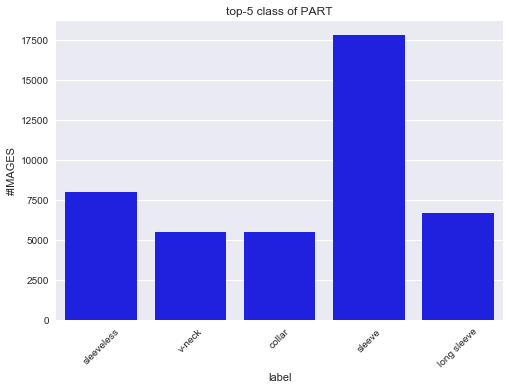

In [11]:
import seaborn as sb

# gen_order = df['label'].value_count().index
sb.countplot(data=df, x='label', color='blue')
# plt.bar(df, label=df['label'], color='blue')
# plt.legend()
plt.ylabel('#IMAGES')
plt.xticks(rotation=45)
plt.title('top-5 class of PART')
plt.savefig('part.png')
plt.show()

# CLASS BALANCE

In [11]:
## balance classes
UPPER_LIMIT = 6000#8000

count_dict = defaultdict(lambda : 0)

labels =[]
paths =[]

for i,l in enumerate(image_label):
    if l=='sleeve' or l =='sleeveless' or l =='long sleeve' or l=='v-neck' or l=='collar':
        if count_dict[l] < UPPER_LIMIT:
            labels.append(image_label[i])
            paths.append(image_path[i])
    count_dict[l]+=1
    
df = pd.DataFrame({'path':paths,'label':labels})
Counter(df['label'])

Counter({'collar': 5452,
         'long sleeve': 6000,
         'sleeve': 6000,
         'sleeveless': 6000,
         'v-neck': 5493})

In [12]:
## PREPARE   TRAIN , TEST , VALIDATION :STRATIFIED
TEST_SIZE = 0.999

X_train, X_test, y_train, y_test = train_test_split(df['path'], df['label'],stratify=df['label'], test_size=TEST_SIZE)

train = pd.DataFrame({'path':X_train,'label':y_train})
test_data = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_train, X_test, y_train, y_test
print "TRAIN data size "
print train.shape

print "TEST and VALIDATION data size  "
print test_data.shape

X_val, X_test, y_val, y_test = train_test_split(test_data['path'], test_data['label'],stratify=test_data['label'], test_size=0.25)

val = pd.DataFrame({'path':X_val,'label':y_val})
test = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_val, X_test, y_val, y_test,df

Counter(test['label'])


#  ====== DROP INDEXES ============


val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

TRAIN data size 
(28, 2)
TEST and VALIDATION data size  
(28917, 2)


In [13]:
print sum(Counter(test['label']).values())
print sum(Counter(val['label']).values())

7230
21687


In [14]:
val.head()

,label,path
0,collar,img/Popcorn_Knit_Cardigan/img_00000013.jpg
1,sleeveless,img/Floral_Print_Surplice_Dress/img_00000014.jpg
2,v-neck,img/Striped_Loose-Knit_Sweater/img_00000014.jpg
3,collar,img/Lace_Collar_Shift_Dress/img_00000047.jpg
4,v-neck,img/Contrast_Chiffon_Shift_Dress/img_00000044.jpg


In [15]:
test.head()

,label,path
0,long sleeve,img/Dotted_Crochet-Trimmed_Collared_Blouse/img...
1,sleeveless,img/Floral_Crochet_Racerback_Romper/img_000000...
2,long sleeve,img/High-Neck_Sheer_Blouse/img_00000101.jpg
3,sleeveless,img/Fluttered_Polka_Dot_Blouse/img_00000028.jpg
4,collar,img/Collared_Plaid_Blouse/img_00000008.jpg


In [16]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri4/test/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri4/test/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        #print label
        src = img_path+data.iloc[i]['path']
        #print src
        #print dest_dir+'/'+label
        #break
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(test)    

Total Images : 7230
0
1000
2000
3000
4000
5000
6000
7000


In [17]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri4/val/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri4/val/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        src = img_path+data.iloc[i]['path']
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(val)    

Total Images : 21687
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000


In [18]:
N_CLASSES = 5